In [1]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [2]:
import numpy as np

In [3]:
np.max(X_train[0])

255

In [4]:
X_train = X_train / 255
X_test = X_test / 255

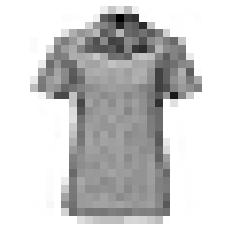

In [5]:
import matplotlib.pyplot as plt 
plt.imshow(X_train[164], cmap="binary")
plt.axis('off')
plt.show()

In [6]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka",
               "sandał", "koszula", "but", "torba", "kozak"]
class_names[y_train[142]]

'but'

In [20]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])






In [21]:
import os
root_logdir = os.path.join(os.curdir, "image_logs")
def get_run_logdir(): 
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [96]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1, callbacks=tensorboard_cb) 

Epoch 1/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2673 - accuracy: 0.9051 - val_loss: 0.3287 - val_accuracy: 0.8832
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2634 - accuracy: 0.9046 - val_loss: 0.3202 - val_accuracy: 0.8828
Epoch 3/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2579 - accuracy: 0.9069 - val_loss: 0.3304 - val_accuracy: 0.8828
Epoch 4/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2539 - accuracy: 0.9087 - val_loss: 0.3230 - val_accuracy: 0.8827
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2492 - accuracy: 0.9104 - val_loss: 0.3255 - val_accuracy: 0.8822
Epoch 6/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2443 - accuracy: 0.9132 - val_loss: 0.3187 - val_accuracy: 0.8858
Epoch 7/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2411 - accuracy: 0.9133 - val_loss: 0.3198 - val_accuracy:

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


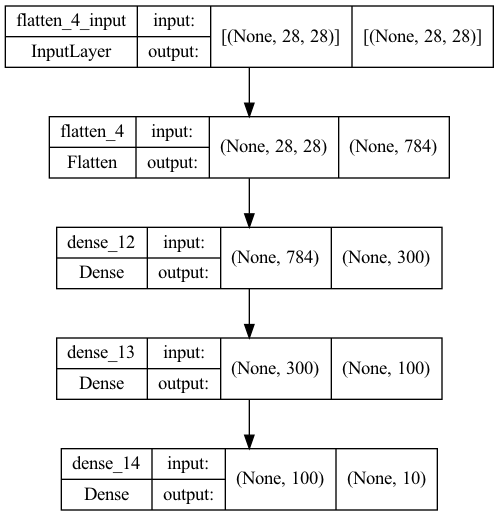

In [97]:
model.predict(X_test)

model.summary()
tf.keras.utils.plot_model(model, "fashion_mnist.png", show_shapes=True)

Prediction: koszula
Confidence: 0.7363857
Truth: pulower


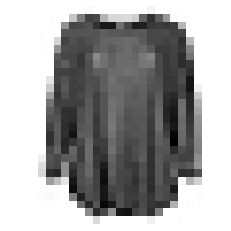

In [98]:
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()

In [99]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [94]:
%tensorboard --logdir ./image_logs

Reusing TensorBoard on port 6008 (pid 4220), started 0:05:36 ago. (Use '!kill 4220' to kill it.)

In [100]:
model.save('fashion_clf.h5')

In [117]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

In [118]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [119]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [123]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="linear"))
model.add(keras.layers.Dense(1))
model.compile(loss="MSE",
              optimizer="sgd",
              metrics=["accuracy"])

es = tf.keras.callbacks.EarlyStopping(patience=5,
                                      min_delta=0.01,verbose=1)

model.fit(X_train, y_train, validation_data=(X_valid,y_valid), epochs=100,  callbacks=[tensorboard_cb,es]) 

Epoch 1/100
 34/363 [=>............................] - ETA: 1s - loss: 2.6058 - accuracy: 0.0037    

2022-05-26 16:00:10.693915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


358/363 [============================>.] - ETA: 0s - loss: 0.8782 - accuracy: 0.0024

2022-05-26 16:00:11.914082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 4ms/step - loss: 0.8719 - accuracy: 0.0025 - val_loss: 24.5704 - val_accuracy: 0.0044
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.8446 - accuracy: 0.0028 - val_loss: 10.3260 - val_accuracy: 0.0044
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 1.0386 - accuracy: 0.0028 - val_loss: 30.2040 - val_accuracy: 0.0044
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: nan - accuracy: 8.6133e-05 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/100
363/363 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
